In [ ]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 1.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import torch
import numpy as np
import torch.nn as nn
from sklearn.model_selection import train_test_split


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
df = pd.read_csv('data/CSE_584_Final_Dataset.csv')
print(df.head())
labels = df['LLM'].tolist()



                              truncated_data  \
0            Ara will be interested when you   
1         As you know, all the medical units   
2     Till now no man there has lived beyond   
3          Maybe they got their radio turned   
4  So if somebody wanted to, say, track down   

                                      generated_data                 LLM  
0  Ara will be interested in learning more about ...    tinydolphin:1.1b  
1  can be converted to corresponding metric equiv...  mixtral-8x7b-32768  
2                                         the grave.           orca-mini  
3             up too loud, causing the interference.  mixtral-8x7b-32768  
4  potential leads or sources for a new business ...           orca-mini  


In [ ]:
!pip install xformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 71.6 MB/s eta 0:00:00


In [ ]:
model = SentenceTransformer("dunzhang/stella_en_400M_v5", trust_remote_code=True).cuda()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/169k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/892 [00:00<?, ?B/s]

configuration.py:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/dunzhang/stella_en_400M_v5:
- configuration.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling.py:   0%|          | 0.00/57.5k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/dunzhang/stella_en_400M_v5:
- modeling.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/1.74G [00:00<?, ?B/s]

Some weights of the model checkpoint at dunzhang/stella_en_400M_v5 were not used when initializing NewModel: ['new.pooler.dense.bias', 'new.pooler.dense.weight']
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/186 [00:00<?, ?B/s]

2_Dense_1024/config.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/4.20M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/4.20M [00:00<?, ?B/s]

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['LLM'])

batch_size = 512
sentence_embeddings = []

for i in range(0, len(df['truncated_data']), batch_size):
    xi = df['truncated_data'][i:i + batch_size]
    xj = df['generated_data'][i:i + batch_size]

    # Encode the batch of sentences
    embeddings1 = model.encode(xi.tolist())
    embeddings2 = model.encode(xj.tolist())
    embeddings = np.concatenate((embeddings1, embeddings2), axis=1)
    sentence_embeddings.append(embeddings)

sentence_embeddings = np.vstack(sentence_embeddings)
np.save('sentence_embeddings.npy', sentence_embeddings)

In [ ]:
sentence_embeddings = np.load('sentence_embeddings.npy')

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print('Label Mapping:', label_mapping)
numeric_labels = df['label_encoded'].tolist()
print(numeric_labels)

Label Mapping: {'gpt-2': 0, 'llama3.2:1b': 1, 'mixtral-8x7b-32768': 2, 'orca-mini': 3, 'tinydolphin:1.1b': 4}
[4, 2, 3, 2, 3, 2, 4, 0, 0, 2, 0, 2, 2, 3, 3, 0, 0, 0, 2, 4, 2, 4, 2, 2, 0, 2, 2, 4, 4, 1, 3, 1, 4, 4, 2, 2, 4, 2, 0, 4, 0, 2, 1, 2, 1, 4, 0, 2, 1, 3, 2, 0, 4, 1, 3, 3, 3, 2, 4, 3, 4, 0, 4, 3, 2, 2, 2, 1, 0, 0, 2, 1, 2, 4, 4, 3, 0, 3, 4, 2, 1, 0, 2, 2, 3, 4, 2, 4, 0, 4, 0, 1, 0, 0, 0, 1, 1, 2, 4, 4, 3, 3, 3, 4, 3, 4, 2, 0, 1, 0, 0, 0, 0, 2, 3, 4, 4, 3, 0, 3, 3, 0, 0, 2, 3, 1, 3, 1, 4, 2, 2, 3, 4, 0, 0, 1, 4, 4, 1, 1, 2, 1, 4, 1, 4, 1, 0, 0, 0, 1, 1, 3, 1, 1, 3, 0, 3, 2, 3, 1, 4, 2, 2, 2, 3, 4, 2, 1, 4, 1, 3, 2, 2, 4, 3, 3, 1, 0, 2, 4, 3, 3, 1, 2, 2, 1, 1, 0, 3, 0, 2, 4, 1, 2, 4, 4, 1, 3, 1, 3, 1, 0, 4, 2, 4, 2, 1, 0, 4, 2, 4, 1, 1, 2, 3, 2, 2, 3, 4, 4, 3, 1, 3, 4, 1, 4, 3, 1, 4, 1, 1, 2, 0, 2, 4, 0, 0, 4, 3, 0, 3, 1, 1, 0, 2, 2, 2, 3, 4, 0, 4, 1, 3, 1, 0, 1, 2, 0, 4, 3, 2, 1, 2, 3, 4, 1, 3, 1, 4, 3, 1, 3, 2, 4, 2, 4, 2, 1, 1, 0, 3, 1, 0, 0, 3, 1, 1, 0, 1, 0, 0, 2, 3, 0, 0, 3, 2

In [ ]:
sentence_embeddings.shape

(21513, 2048)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sentence_embeddings, numeric_labels, test_size=0.2, random_state=42, shuffle=False)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train).float().cuda()
y_train_tensor = torch.tensor(y_train).long().cuda()
X_test_tensor = torch.tensor(X_test).float().cuda()
y_test_tensor = torch.tensor(y_test).long().cuda()


In [ ]:
class SentenceClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim):
        super(SentenceClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.fc4 = nn.Linear(hidden_dim3, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Apply the layers with ReLU activations
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        return x

In [ ]:
input_dim = 2048  # Embedding dimension
hidden_dim1 = 1024
hidden_dim2 = 256
hidden_dim3 = 128
output_dim = len(set(numeric_labels))  # Number of LLMs (classes)


In [ ]:
classifier = SentenceClassifier(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim).cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classifier.parameters(), lr=0.001)


In [ ]:
epochs = 200
for epoch in range(epochs):
    classifier.train()
    optimizer.zero_grad()

    outputs = classifier(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [1/200], Loss: 1.6108
Epoch [2/200], Loss: 1.5718
Epoch [3/200], Loss: 1.5264
Epoch [4/200], Loss: 1.4971
Epoch [5/200], Loss: 1.3825
Epoch [6/200], Loss: 1.3472
Epoch [7/200], Loss: 1.3313
Epoch [8/200], Loss: 1.2778
Epoch [9/200], Loss: 1.2442
Epoch [10/200], Loss: 1.2029
Epoch [11/200], Loss: 1.1955
Epoch [12/200], Loss: 1.1506
Epoch [13/200], Loss: 1.1496
Epoch [14/200], Loss: 1.1147
Epoch [15/200], Loss: 1.1059
Epoch [16/200], Loss: 1.0916
Epoch [17/200], Loss: 1.0815
Epoch [18/200], Loss: 1.0593
Epoch [19/200], Loss: 1.0492
Epoch [20/200], Loss: 1.0363
Epoch [21/200], Loss: 1.0339
Epoch [22/200], Loss: 1.0133
Epoch [23/200], Loss: 0.9994
Epoch [24/200], Loss: 0.9997
Epoch [25/200], Loss: 0.9787
Epoch [26/200], Loss: 0.9705
Epoch [27/200], Loss: 0.9691
Epoch [28/200], Loss: 0.9465
Epoch [29/200], Loss: 0.9432
Epoch [30/200], Loss: 0.9374
Epoch [31/200], Loss: 0.9172
Epoch [32/200], Loss: 0.9147
Epoch [33/200], Loss: 0.9051
Epoch [34/200], Loss: 0.8930
Epoch [35/200], Loss: 0

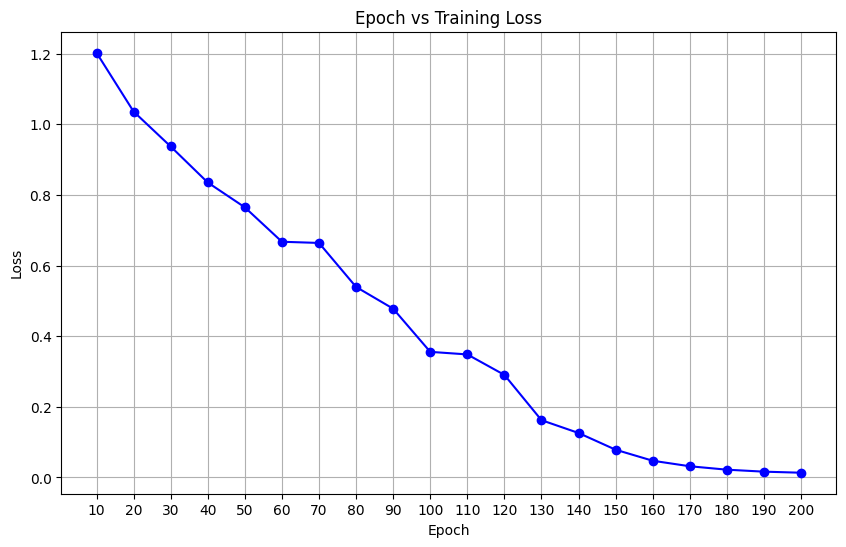

In [ ]:
import matplotlib.pyplot as plt

# Epoch and loss data for every 10th epoch
epochs = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
losses = [1.2029, 1.0363, 0.9374, 0.8354, 0.7651, 0.6676, 0.6642, 0.5396, 0.4780, 0.3558, 0.3485, 0.2905,
          0.1623, 0.1260, 0.0786, 0.0474, 0.0318, 0.0221, 0.0165, 0.0135]

plt.figure(figsize=(10, 6))
plt.plot(epochs, losses, marker='o', linestyle='-', color='b')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.xticks(epochs)
plt.show()


In [ ]:
classifier.eval()
with torch.no_grad():
    test_outputs = classifier(X_test_tensor)
    predicted = torch.argmax(test_outputs, dim=1)
    accuracy = (predicted == y_test_tensor).float().mean()
    print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.6528


## Hyper parameter Tuning

In [ ]:
def train_model(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim, lr, batch_size, epochs):
    classifier = SentenceClassifier(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim).cuda()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(classifier.parameters(), lr=lr)

    for epoch in range(epochs):
        # print(f'epoch: {epoch}')
        classifier.train()
        optimizer.zero_grad()
        outputs = classifier(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

    classifier.eval()
    with torch.no_grad():
        test_outputs = classifier(X_test_tensor)
        predicted = torch.argmax(test_outputs, dim=1)
        accuracy = (predicted == y_test_tensor).float().mean().item()

    return accuracy

In [ ]:
import itertools

param_grid = {
    'hidden_dim1':[512, 1024],
    'hidden_dim2':[128,256],
    'hidden_dim3':[64,128],
    'lr':[1e-4,2e-5,1e-3],
    'batch_size':[32,64,128,512],
    'epochs':[50,100,250,500]
}

combinations = list(itertools.product(param_grid['hidden_dim1'],param_grid['hidden_dim2'],param_grid['hidden_dim3'],param_grid['lr'],param_grid['batch_size'],param_grid['epochs']))

In [ ]:
len(combinations)

384

In [ ]:
best_accuracy = 0
best_params = None
results = []

for combo in combinations:
  print(f'combo: {combo}')
  hidden_dim1,hidden_dim2, hidden_dim3, lr, batch_size, epochs = combo
  accuracy = train_model(input_dim=2048,hidden_dim1=hidden_dim1,hidden_dim2=hidden_dim2,hidden_dim3=hidden_dim3,output_dim=len(set(numeric_labels)), lr=lr, batch_size=batch_size,epochs=epochs)

  if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_params = combo

  results.append({
      'hidden_dim1': hidden_dim1,
      'hidden_dim2': hidden_dim2,
      'hidden_dim3': hidden_dim3,
      'lr': lr,
      'batch_size': batch_size,
      'epochs': epochs,
      'accuracy': accuracy
  })


print(f'Best Accuracy: {best_accuracy}')
print(f'Best Hyperparameters: {best_params}')
results_df = pd.DataFrame(results)

combo: (512, 128, 64, 0.0001, 32, 50)
combo: (512, 128, 64, 0.0001, 32, 100)
combo: (512, 128, 64, 0.0001, 32, 250)
combo: (512, 128, 64, 0.0001, 32, 500)
combo: (512, 128, 64, 0.0001, 64, 50)
combo: (512, 128, 64, 0.0001, 64, 100)
combo: (512, 128, 64, 0.0001, 64, 250)
combo: (512, 128, 64, 0.0001, 64, 500)
combo: (512, 128, 64, 0.0001, 128, 50)
combo: (512, 128, 64, 0.0001, 128, 100)
combo: (512, 128, 64, 0.0001, 128, 250)
combo: (512, 128, 64, 0.0001, 128, 500)
combo: (512, 128, 64, 0.0001, 512, 50)
combo: (512, 128, 64, 0.0001, 512, 100)
combo: (512, 128, 64, 0.0001, 512, 250)
combo: (512, 128, 64, 0.0001, 512, 500)
combo: (512, 128, 64, 2e-05, 32, 50)
combo: (512, 128, 64, 2e-05, 32, 100)
combo: (512, 128, 64, 2e-05, 32, 250)
combo: (512, 128, 64, 2e-05, 32, 500)
combo: (512, 128, 64, 2e-05, 64, 50)
combo: (512, 128, 64, 2e-05, 64, 100)
combo: (512, 128, 64, 2e-05, 64, 250)
combo: (512, 128, 64, 2e-05, 64, 500)
combo: (512, 128, 64, 2e-05, 128, 50)
combo: (512, 128, 64, 2e-05, 128

In [ ]:
results_df.head()

,hidden_dim1,hidden_dim2,hidden_dim3,lr,batch_size,epochs,accuracy,hidden_combined
0,512,128,64,0.0001,32,50,0.544736,128_64
1,512,128,64,0.0001,32,100,0.622357,128_64
2,512,128,64,0.0001,32,250,0.640948,128_64
3,512,128,64,0.0001,32,500,0.641413,128_64
4,512,128,64,0.0001,64,50,0.551476,128_64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

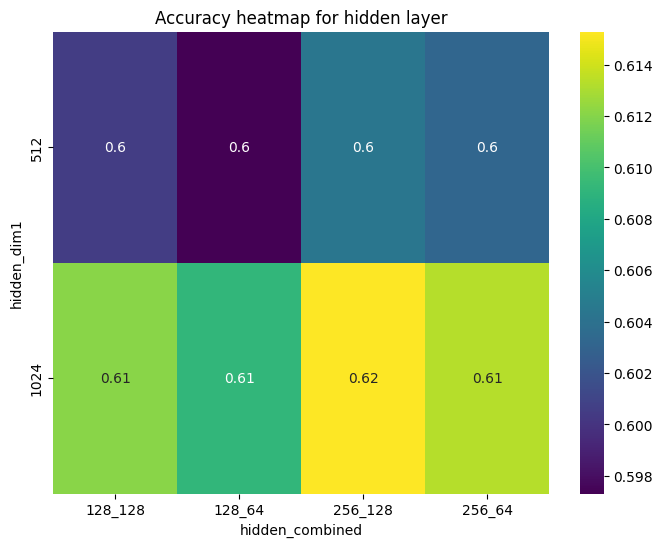

In [ ]:
results_df['hidden_combined'] = results_df['hidden_dim2'].astype(str) + '_' + results_df['hidden_dim3'].astype(str)
heatmap_data = results_df.pivot_table(index='hidden_dim1', columns='hidden_combined', values='accuracy', aggfunc='mean')
plt.figure(figsize=(8,6))
sb.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.title("Accuracy heatmap for hidden layer")
plt.show()

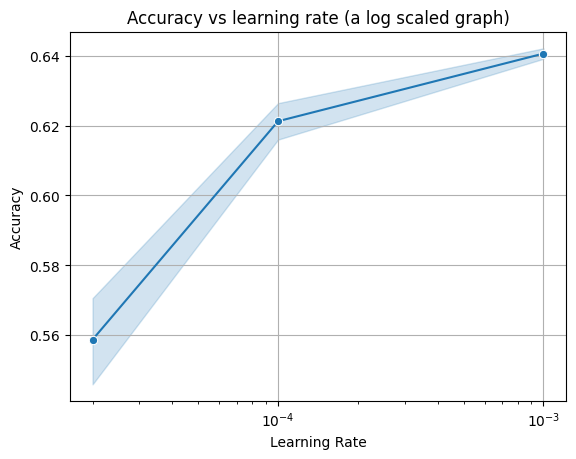

In [ ]:
plt.figure()
sb.lineplot(data=results_df,x='lr',y='accuracy',marker='o')
plt.title("Accuracy vs learning rate (a log scaled graph)")
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

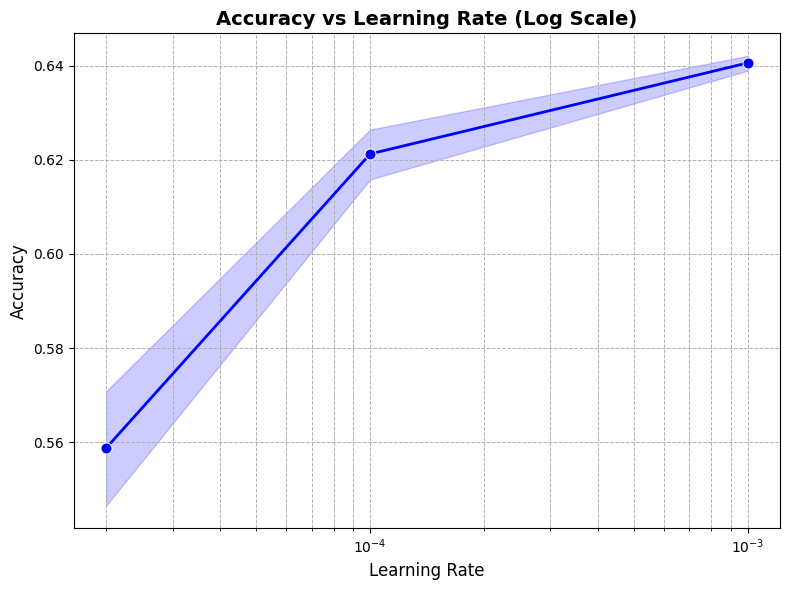

In [ ]:
plt.figure(figsize=(8,6))
sb.lineplot(data=results_df, x='lr', y='accuracy', marker='o',
            linestyle='-', color='b', markersize=8, linewidth=2)
plt.title("Accuracy vs Learning Rate (Log Scale)", fontsize=14, fontweight='bold')  # Improve title size and weight
plt.xscale('log')
plt.xlabel('Learning Rate', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

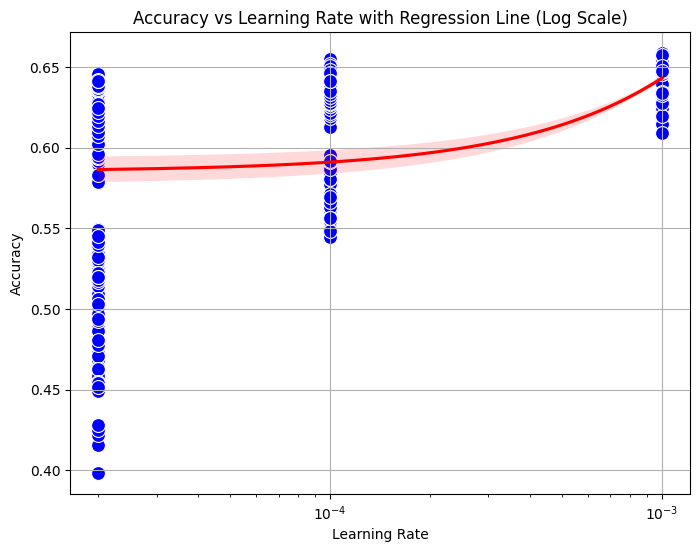

In [ ]:
plt.figure(figsize=(8, 6))
sb.scatterplot(data=results_df, x='lr', y='accuracy', color='blue', s=100)
sb.regplot(data=results_df, x='lr', y='accuracy', scatter=False, color='red')
plt.title("Accuracy vs Learning Rate with Regression Line (Log Scale)")
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

## New set

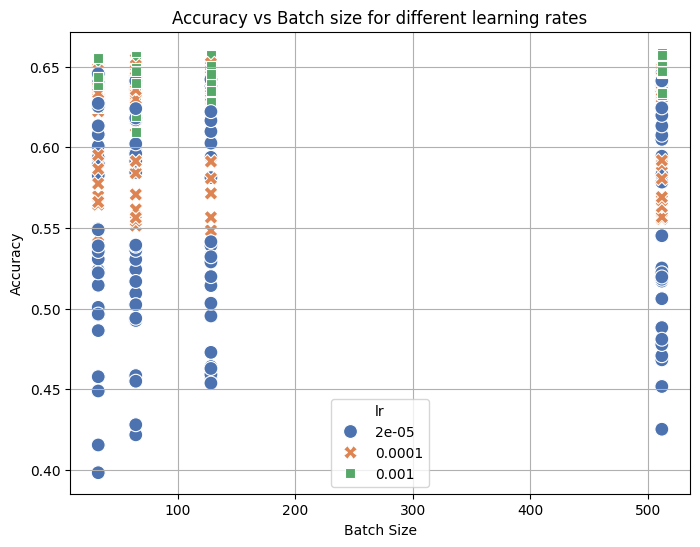

In [ ]:
plt.figure(figsize=(8,6))
sb.scatterplot(data=results_df,x='batch_size',y='accuracy',hue='lr',style='lr',palette='deep',s=100)
plt.title("Accuracy vs Batch size for different learning rates")
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

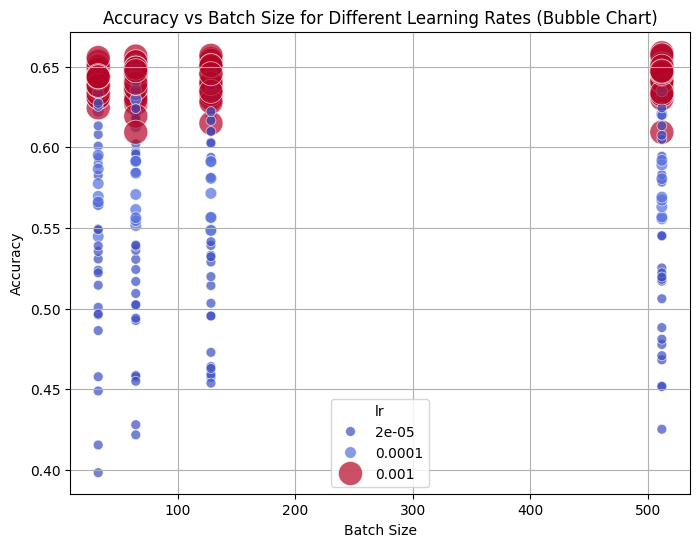

In [ ]:
plt.figure(figsize=(8,6))
sb.scatterplot(data=results_df, x='batch_size', y='accuracy', size='lr', hue='lr', sizes=(50, 300), palette='coolwarm', alpha=0.7)
plt.title("Accuracy vs Batch Size for Different Learning Rates (Bubble Chart)")
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

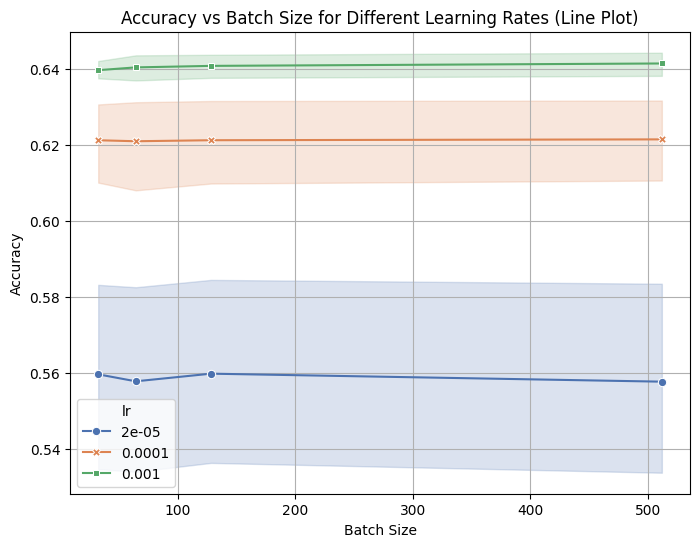

In [ ]:
plt.figure(figsize=(8,6))
sb.lineplot(data=results_df, x='batch_size', y='accuracy', hue='lr', style='lr', markers=True, dashes=False, palette='deep')
plt.title("Accuracy vs Batch Size for Different Learning Rates (Line Plot)")
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

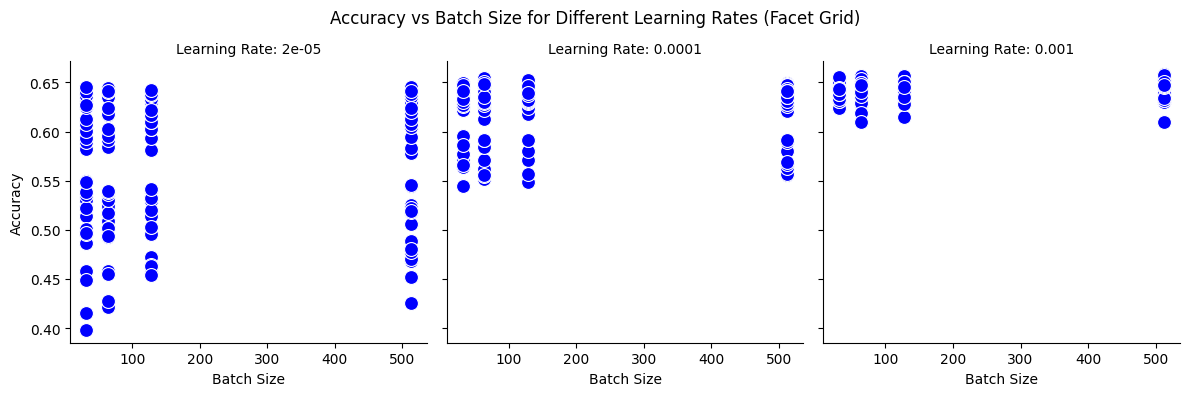

In [ ]:
g = sb.FacetGrid(results_df, col="lr", col_wrap=3, height=4)
g.map(sb.scatterplot, "batch_size", "accuracy", s=100, color="b")
g.set_titles(col_template="Learning Rate: {col_name}")
g.set_axis_labels("Batch Size", "Accuracy")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Accuracy vs Batch Size for Different Learning Rates (Facet Grid)")
plt.show()

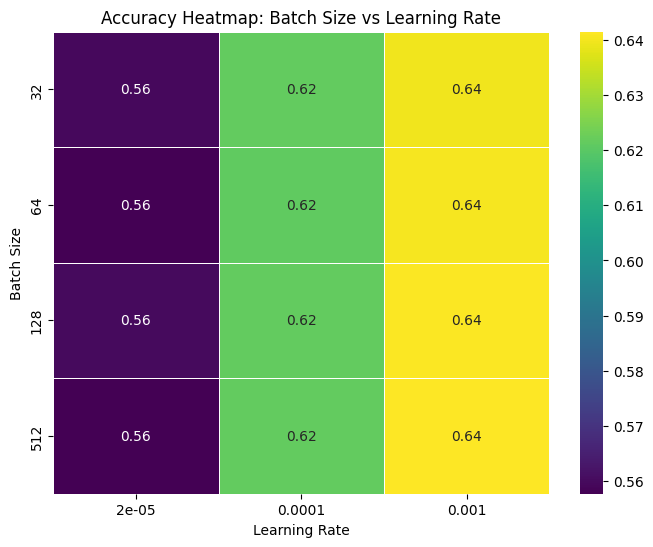

In [ ]:
heatmap_data = results_df.pivot_table(index='batch_size', columns='lr', values='accuracy', aggfunc='mean')
plt.figure(figsize=(8,6))
sb.heatmap(heatmap_data, annot=True, cmap='viridis', linewidths=0.5)
plt.title("Accuracy Heatmap: Batch Size vs Learning Rate")
plt.xlabel('Learning Rate')
plt.ylabel('Batch Size')
plt.show()

## New set

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

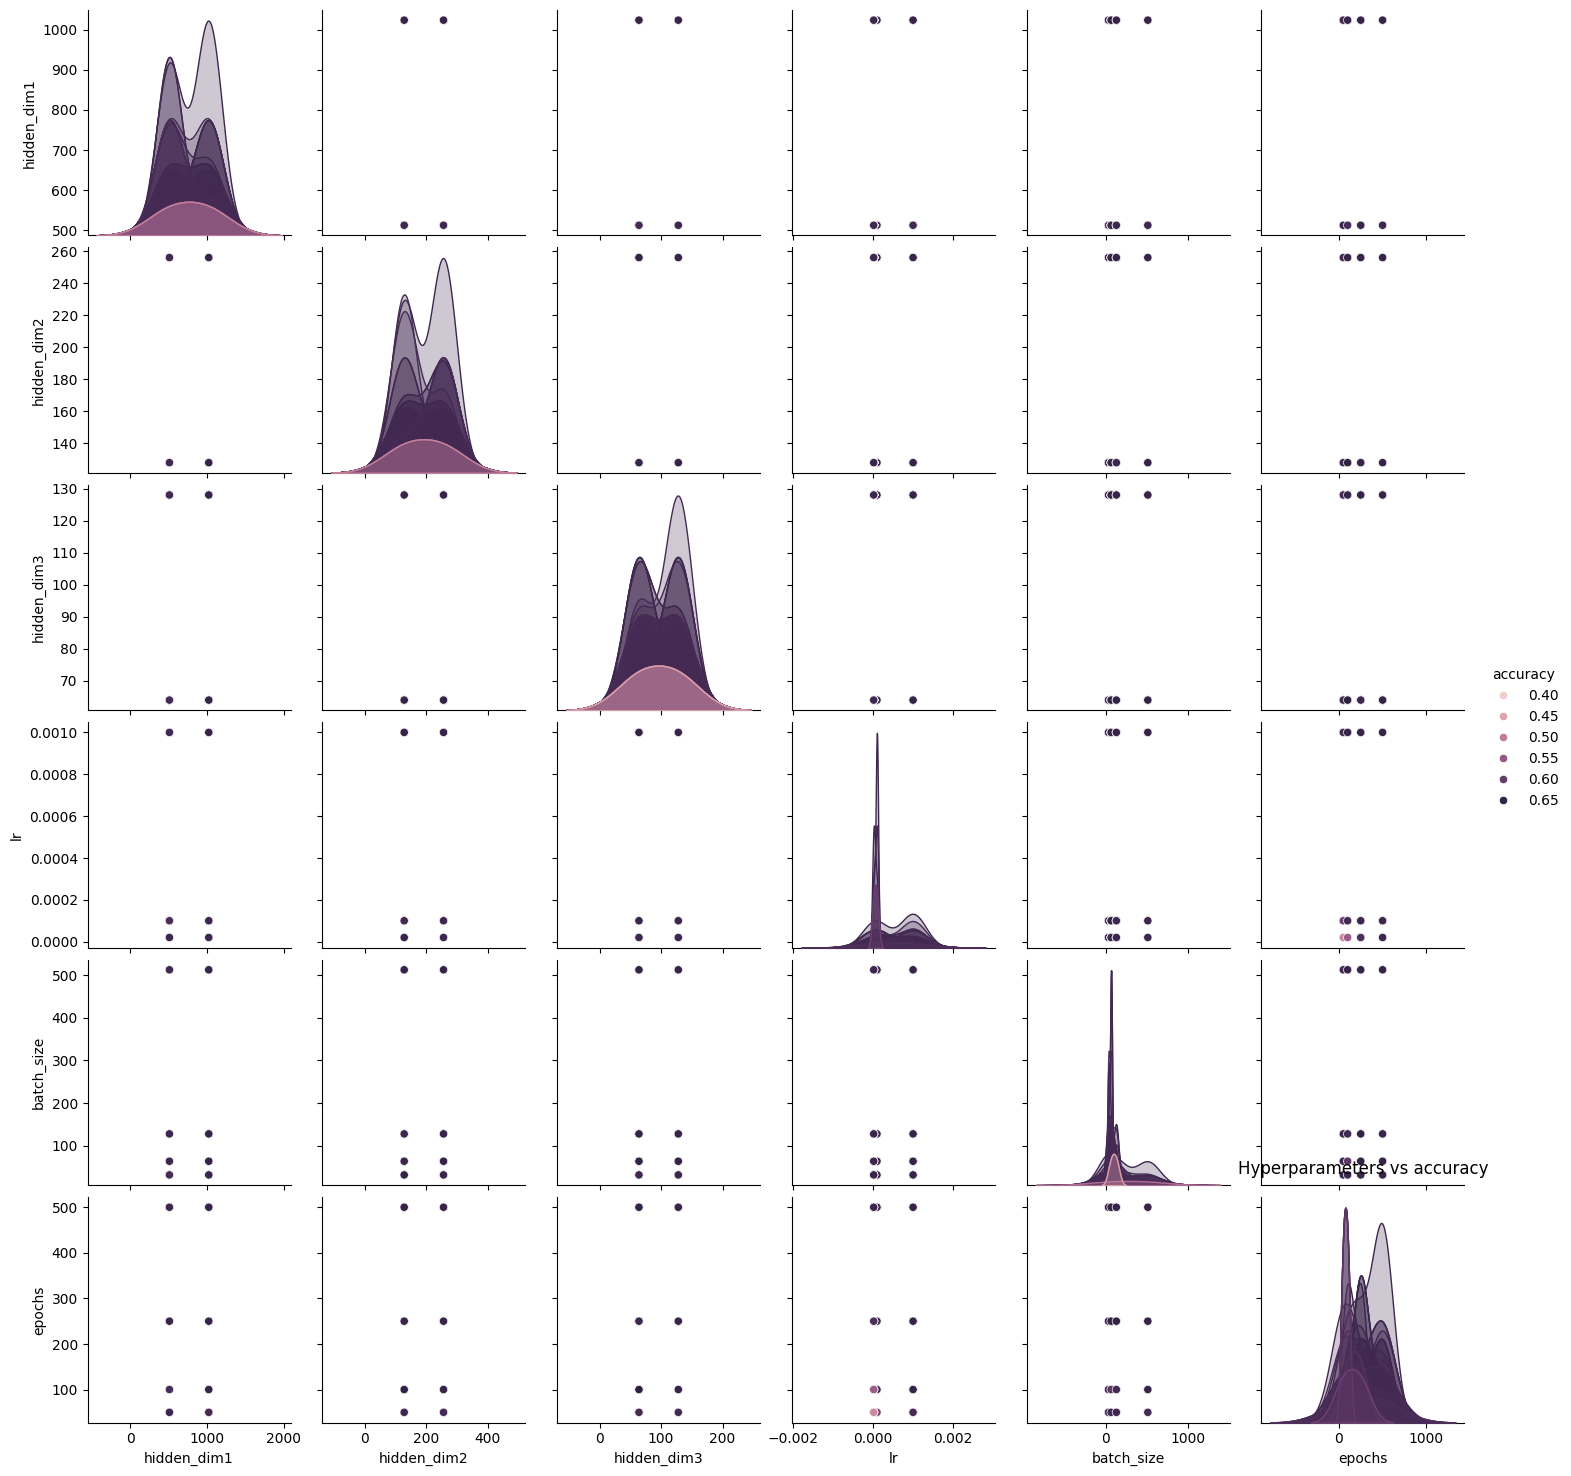

In [ ]:
sb.pairplot(results_df,diag_kind='kde',hue='accuracy')
plt.title("Hyperparameters vs accuracy")
plt.show()

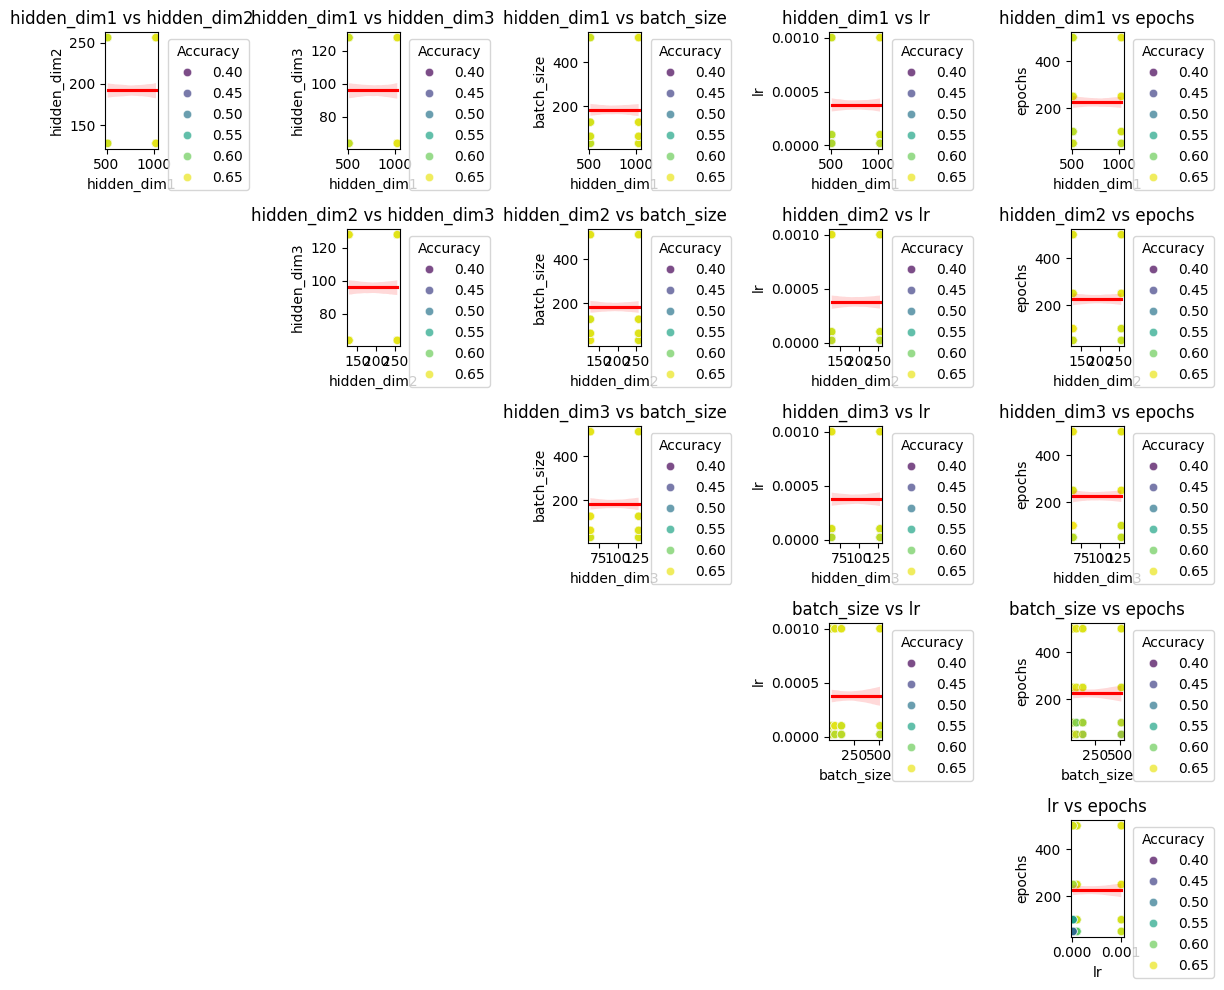

In [ ]:
# List of hyperparameters to plot
hyperparameters = ['hidden_dim1', 'hidden_dim2', 'hidden_dim3', 'batch_size', 'lr','epochs']

# Create a pair of plots
plt.figure(figsize=(12, 10))
for i in range(len(hyperparameters)):
    for j in range(i + 1, len(hyperparameters)):
        plt.subplot(len(hyperparameters)-1, len(hyperparameters)-1, i*(len(hyperparameters)-1) + j)
        sb.scatterplot(data=results_df, x=hyperparameters[i], y=hyperparameters[j], hue='accuracy', palette='viridis', alpha=0.7)
        sb.regplot(data=results_df, x=hyperparameters[i], y=hyperparameters[j], scatter=False, color='red')
        plt.title(f"{hyperparameters[i]} vs {hyperparameters[j]}")
        plt.xlabel(hyperparameters[i])
        plt.ylabel(hyperparameters[j])
        plt.legend(title='Accuracy', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

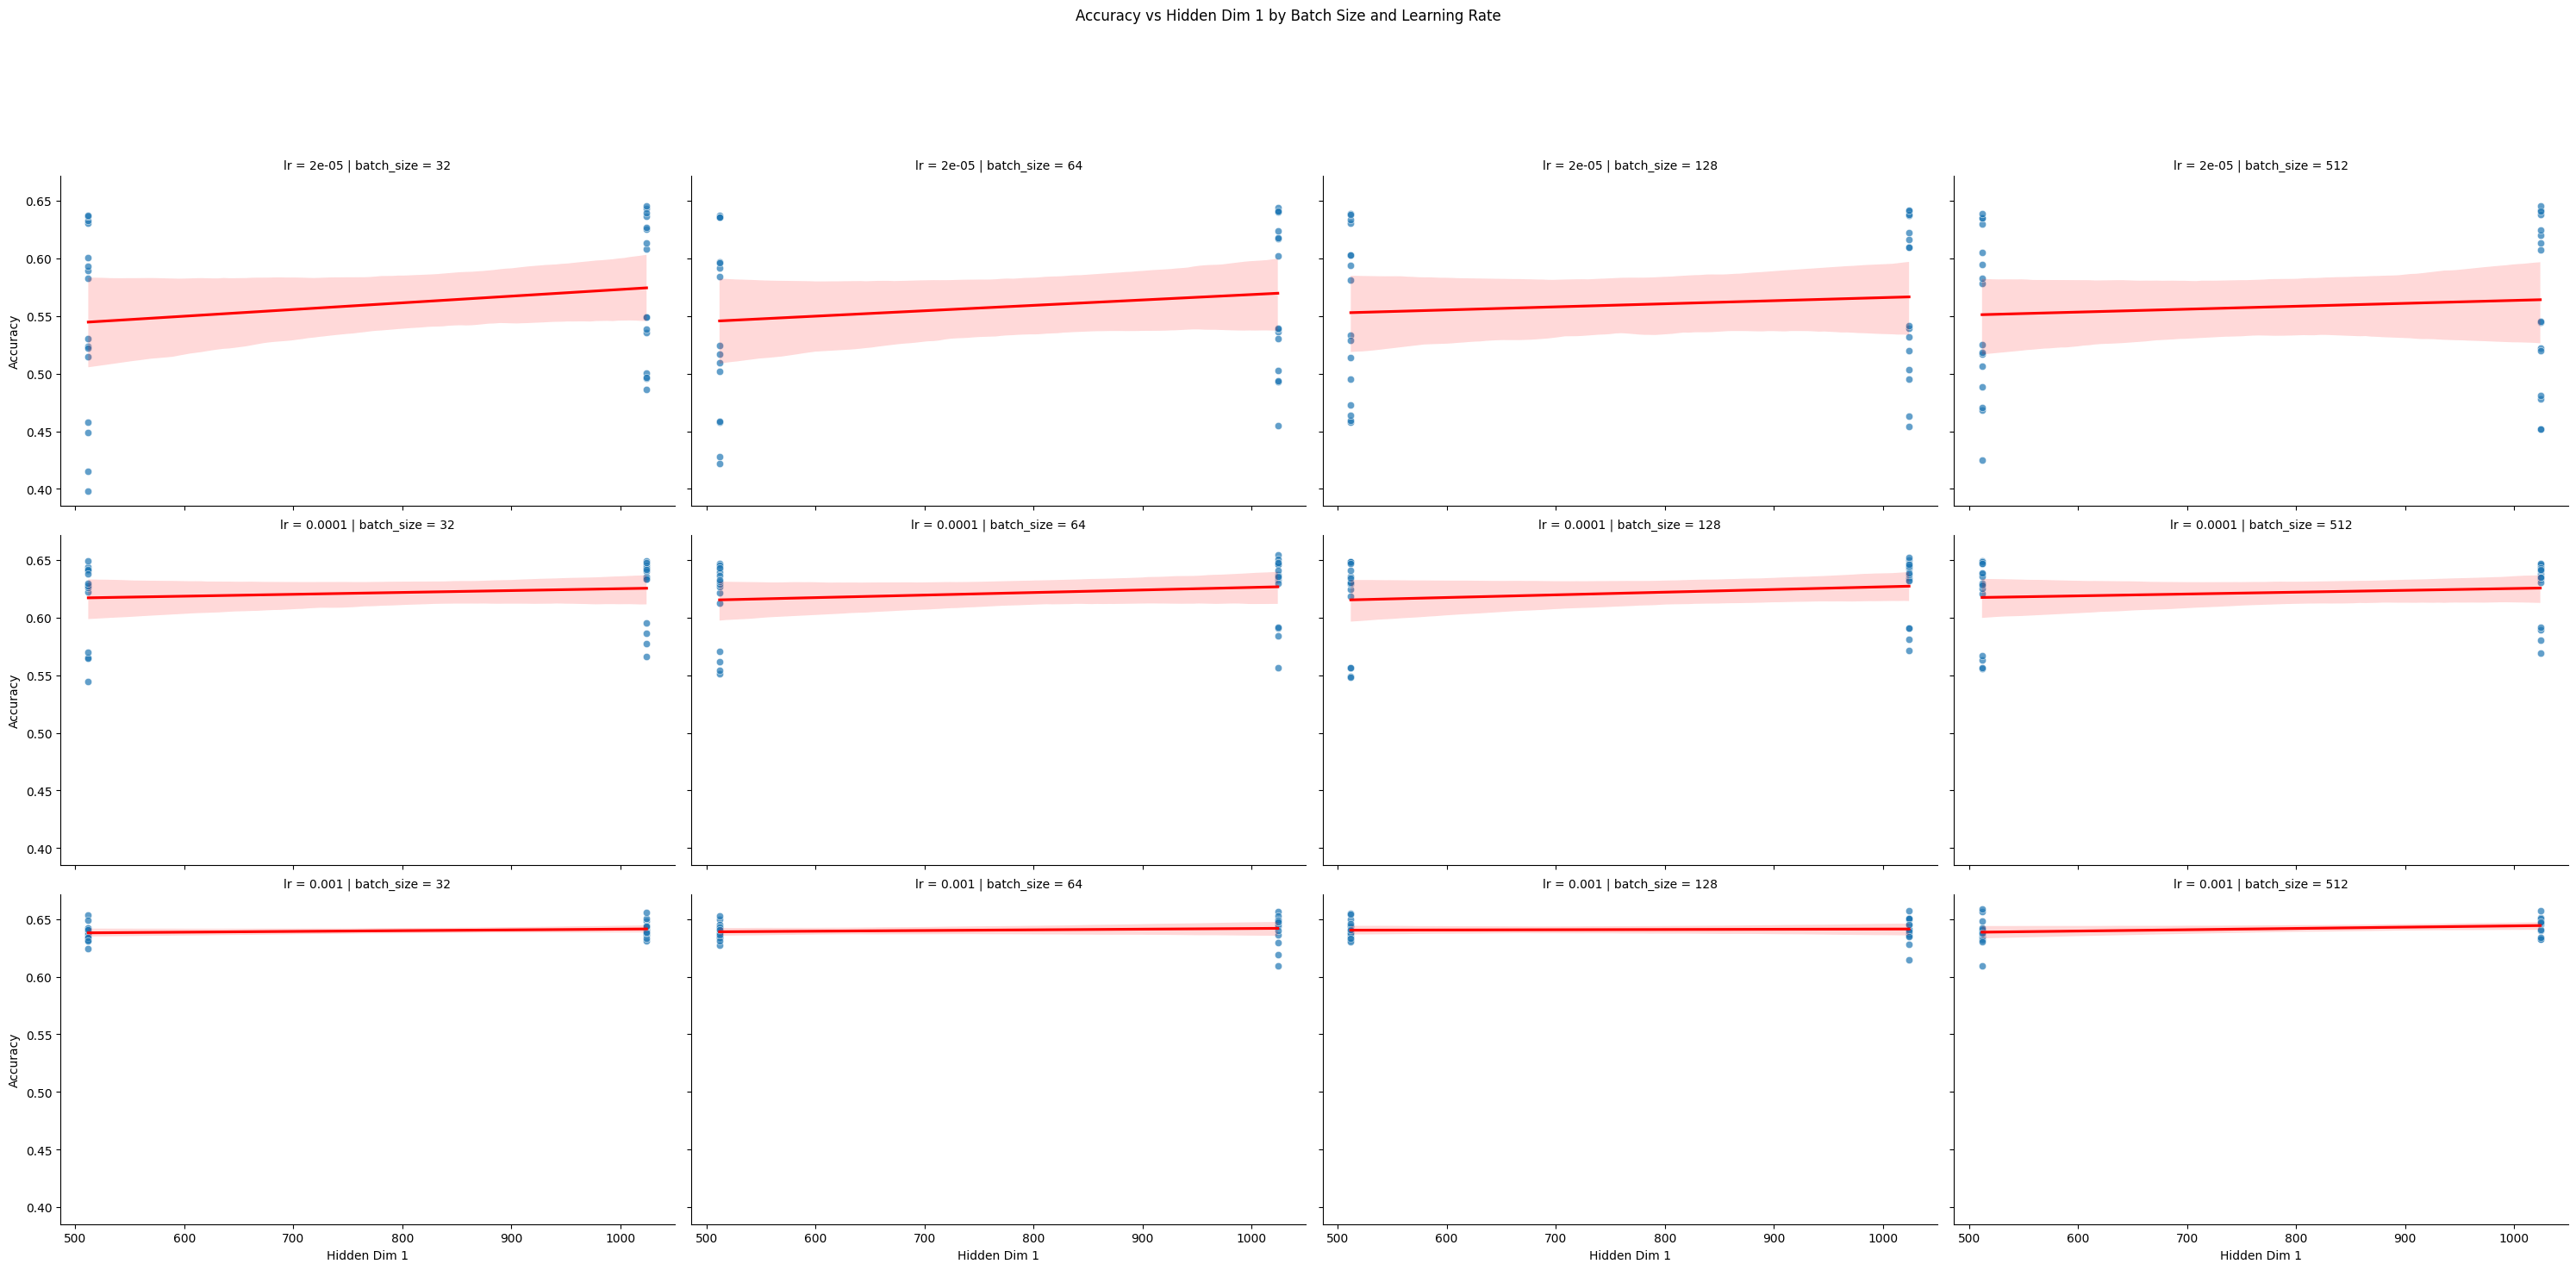

In [ ]:
g = sb.FacetGrid(results_df, col='batch_size', row='lr', height=5, aspect=1.5)
g.map(sb.scatterplot, 'hidden_dim1', 'accuracy', alpha=0.7)
g.map(sb.regplot, 'hidden_dim1', 'accuracy', scatter=False, color='red')
g.set_axis_labels("Hidden Dim 1", "Accuracy")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Accuracy vs Hidden Dim 1 by Batch Size and Learning Rate")
plt.show()

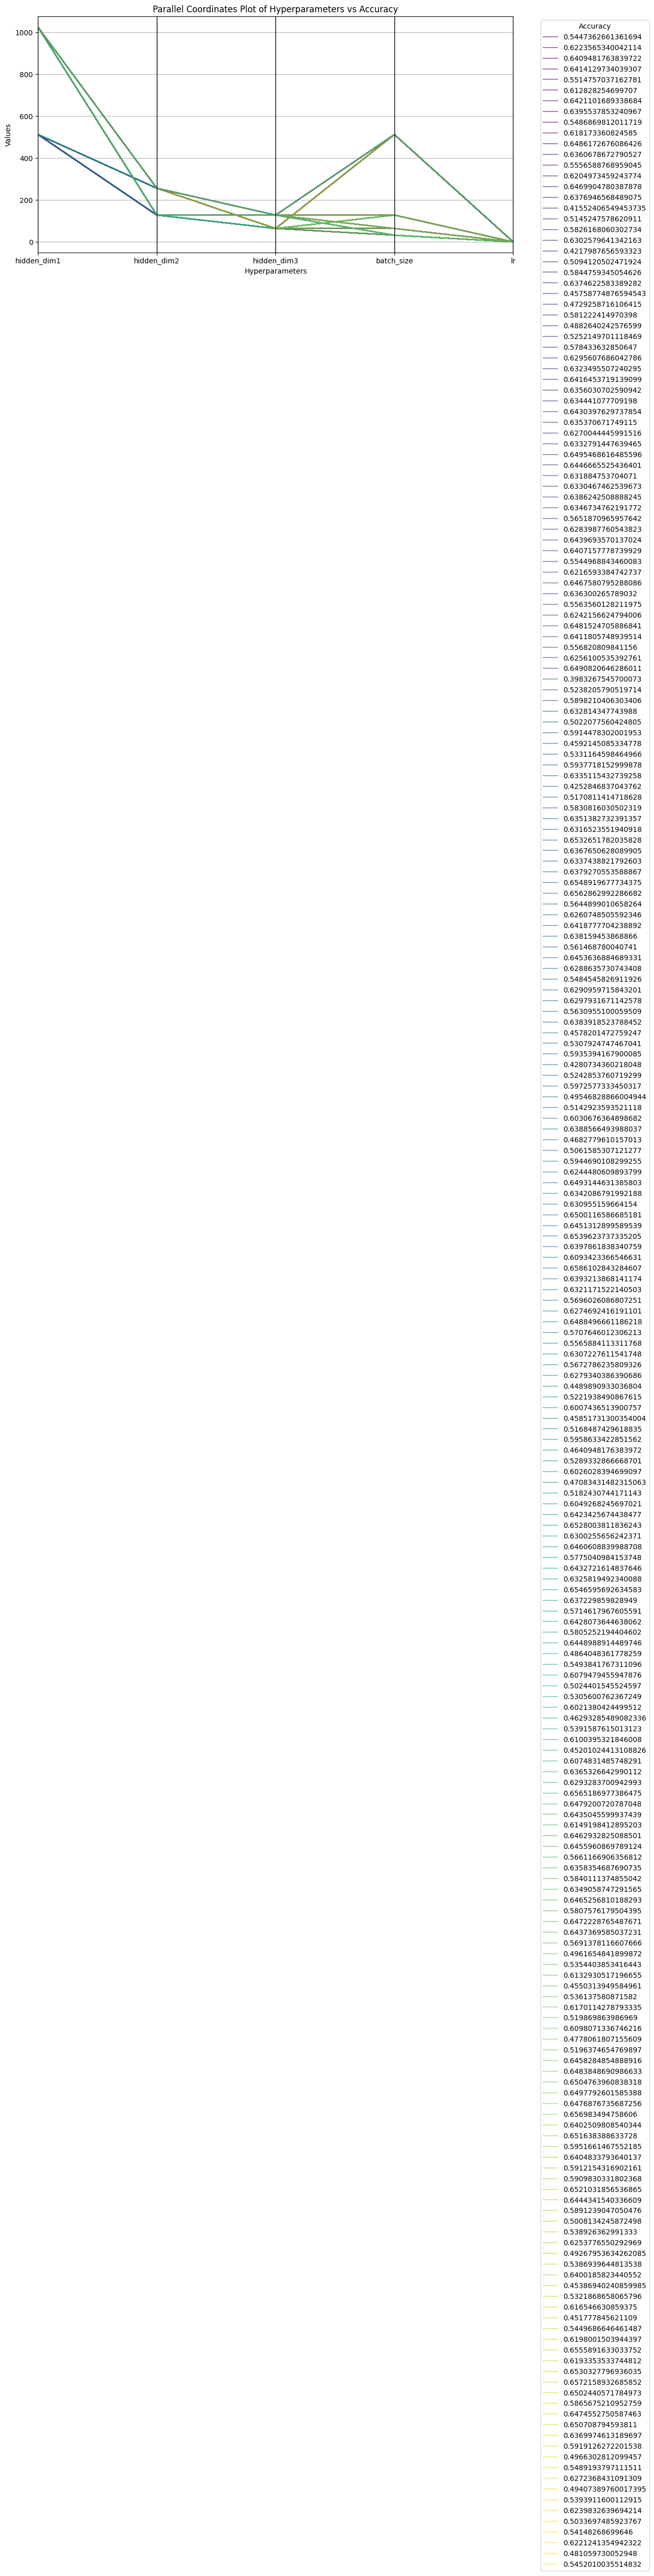

In [ ]:
from pandas.plotting import parallel_coordinates

hyperparameter_cols = ['hidden_dim1', 'hidden_dim2', 'hidden_dim3', 'batch_size', 'lr', 'accuracy']
subset_df = results_df[hyperparameter_cols]
plt.figure(figsize=(12, 6))
parallel_coordinates(subset_df, 'accuracy', colormap='viridis', alpha=0.5)
plt.title("Parallel Coordinates Plot of Hyperparameters vs Accuracy")
plt.xlabel("Hyperparameters")
plt.ylabel("Values")
plt.legend(title='Accuracy', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


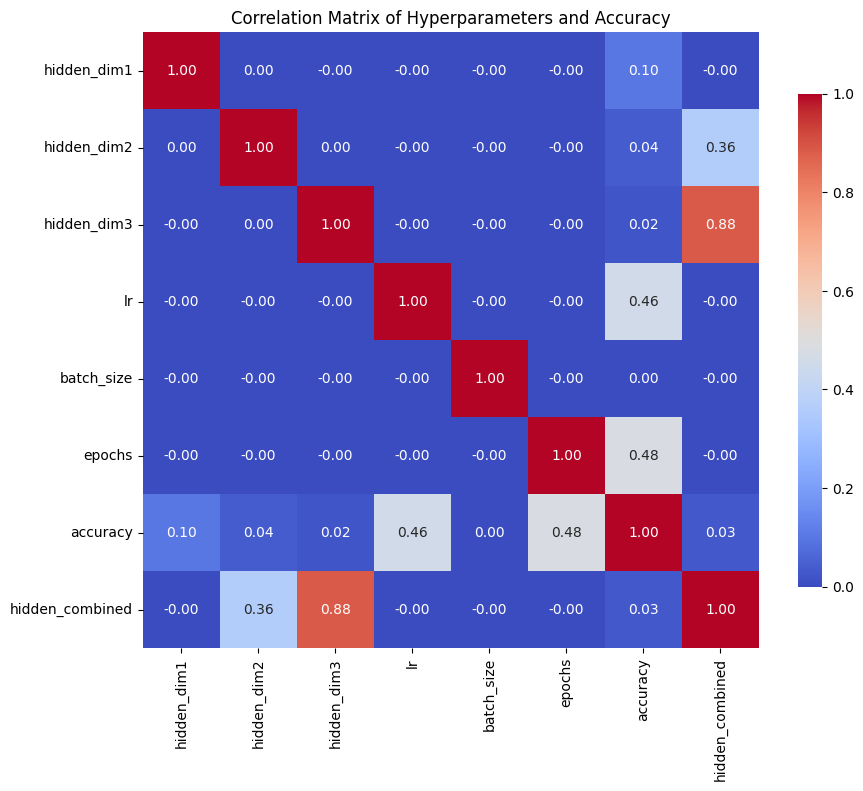

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

corr = results_df.corr()
plt.figure(figsize=(10, 8))
sb.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Hyperparameters and Accuracy")
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter(results_df, x='hidden_dim1', y='accuracy', color='lr', size='batch_size', hover_data=['hidden_dim2', 'hidden_dim3'])
fig.update_layout(title="Accuracy vs Hidden Dim 1 with Learning Rate and Batch Size", xaxis_title="Hidden Dim 1", yaxis_title="Accuracy")
fig.show()

## New graph

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



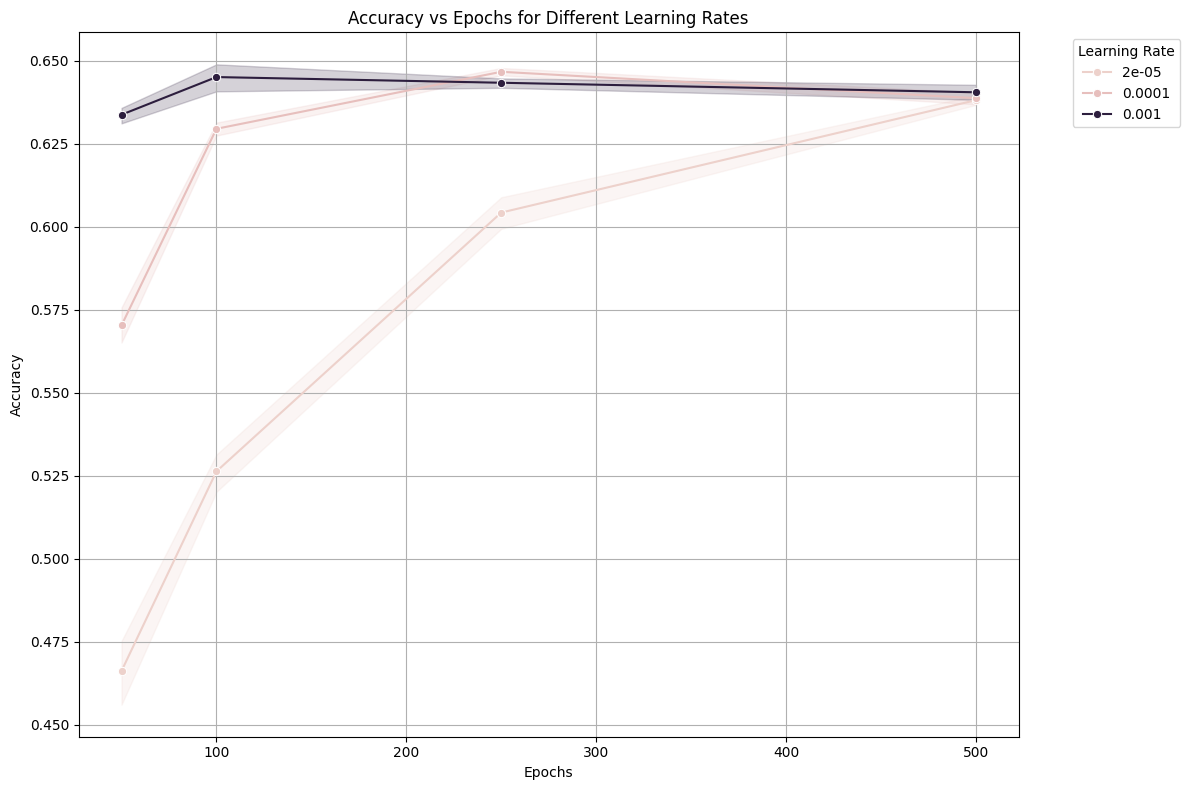

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sb.lineplot(data=results_df, x='epochs', y='accuracy', hue='lr', marker='o')

plt.title("Accuracy vs Epochs for Different Learning Rates")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(title='Learning Rate', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



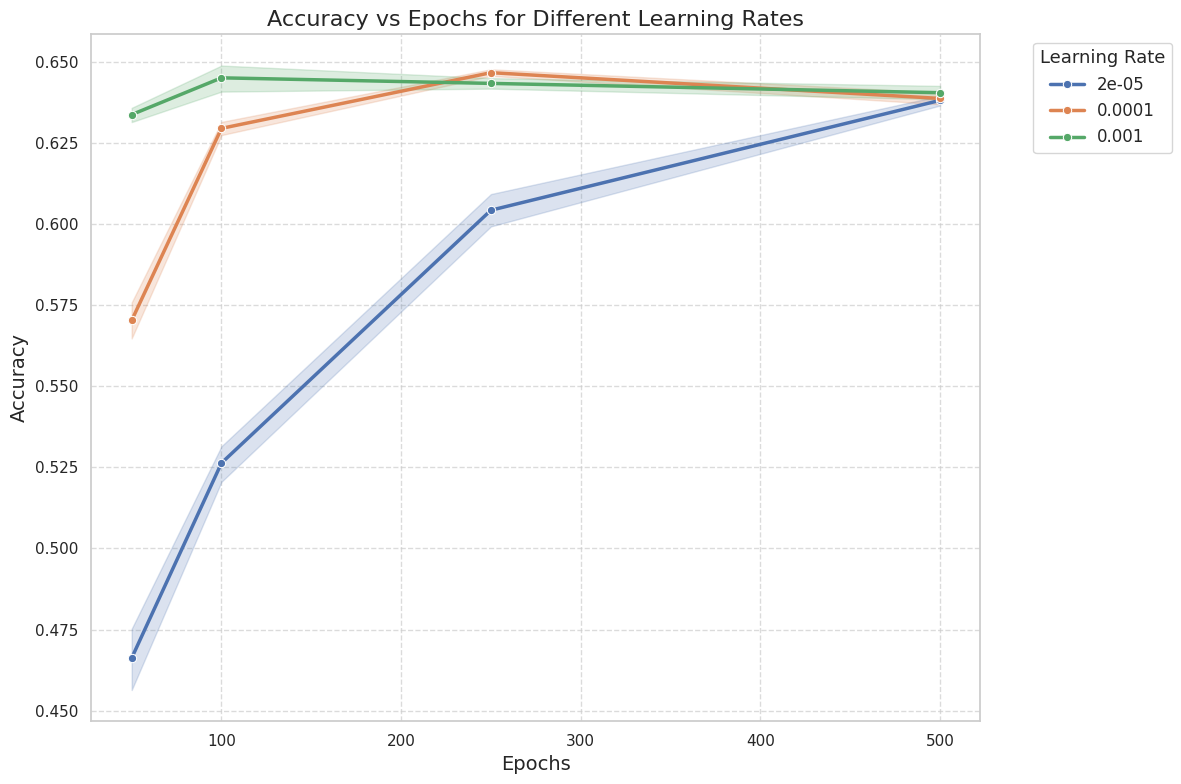

In [ ]:
sb.set(style="whitegrid")

plt.figure(figsize=(12, 8))
line_plot = sb.lineplot(data=results_df, x='epochs', y='accuracy', hue='lr', marker='o',
                         palette='deep', linewidth=2.5)
plt.title("Accuracy vs Epochs for Different Learning Rates", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(title='Learning Rate', title_fontsize='13', fontsize='12', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-90-adaaeca8c4a4>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



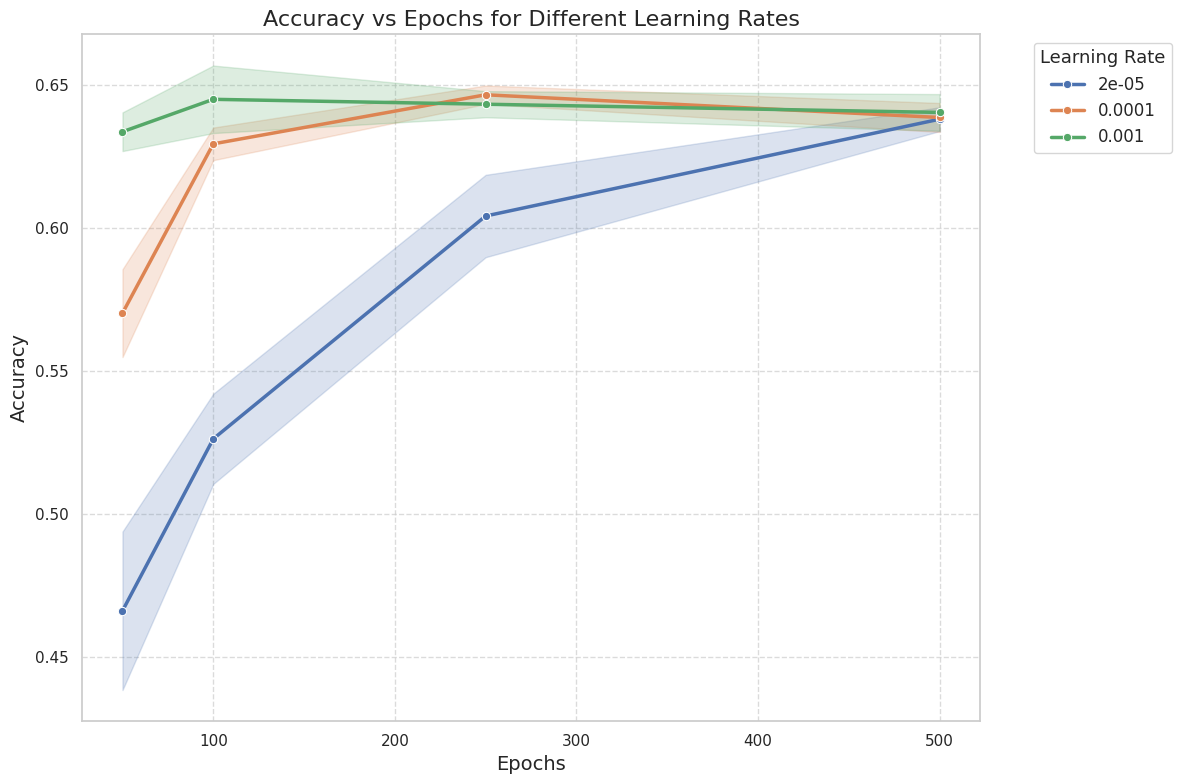

In [ ]:
plt.figure(figsize=(12, 8))
line_plot = sb.lineplot(data=results_df, x='epochs', y='accuracy', hue='lr', marker='o',
                         palette='deep', linewidth=2.5, ci='sd')  # Change ci to 'sd' for standard deviation

plt.title("Accuracy vs Epochs for Different Learning Rates", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)

plt.legend(title='Learning Rate', title_fontsize='13', fontsize='12', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

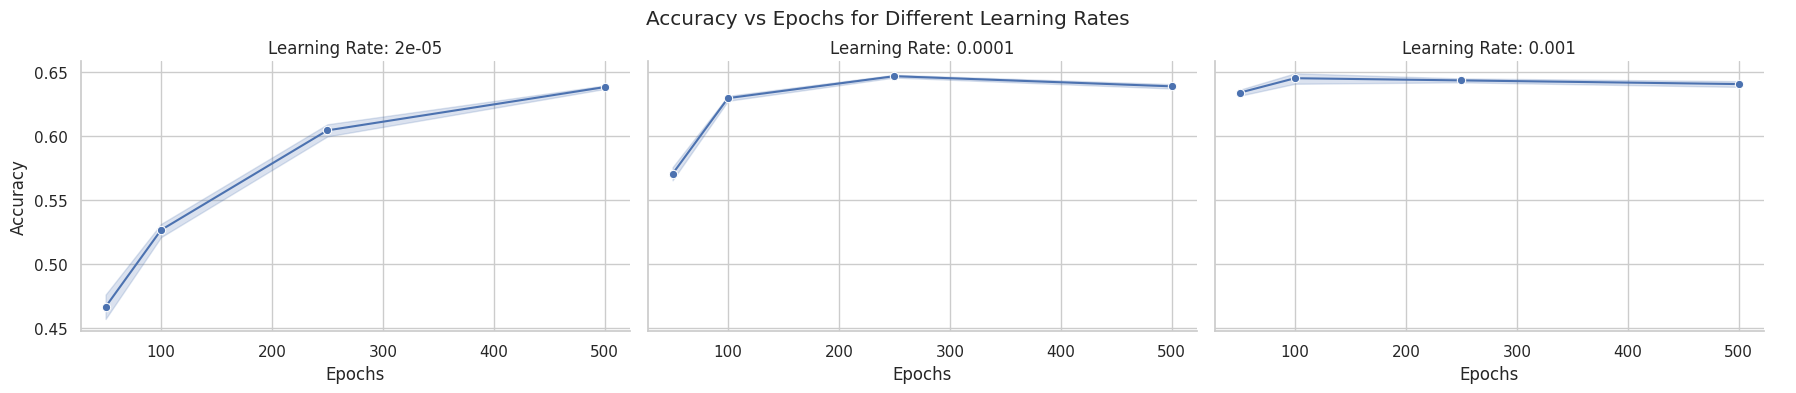

In [ ]:
g = sb.FacetGrid(results_df, col="lr", col_wrap=3, height=4, aspect=1.5)
g.map(sb.lineplot, "epochs", "accuracy", marker="o")
g.set_titles(col_template="Learning Rate: {col_name}")
g.set_axis_labels("Epochs", "Accuracy")
g.add_legend()

plt.subplots_adjust(top=0.85)
g.fig.suptitle("Accuracy vs Epochs for Different Learning Rates")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need t

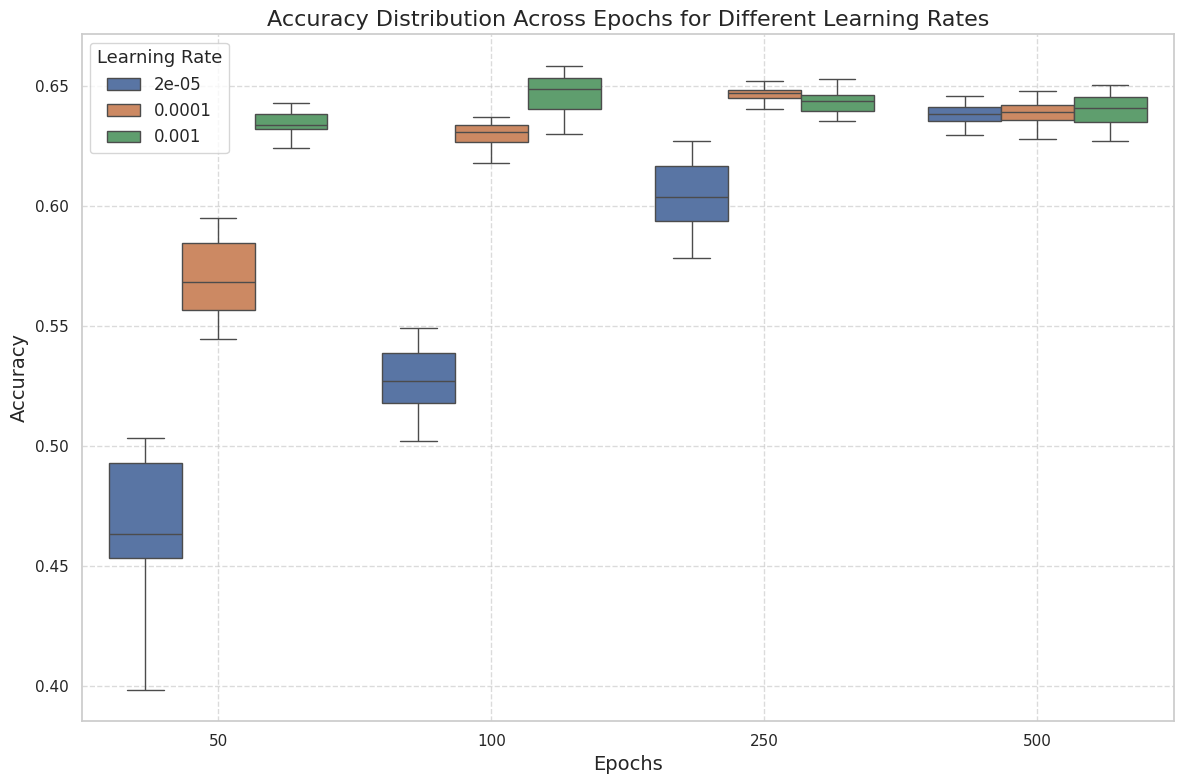

In [ ]:
plt.figure(figsize=(12, 8))
sb.boxplot(data=results_df, x='epochs', y='accuracy', hue='lr', palette='deep', fliersize=0)

plt.title("Accuracy Distribution Across Epochs for Different Learning Rates", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(title='Learning Rate', title_fontsize='13', fontsize='12')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
results_df = pd.DataFrame(results)

In [ ]:
results_df.head()

,hidden_dim1,hidden_dim2,hidden_dim3,lr,batch_size,epochs,accuracy
0,512,128,64,0.0001,32,50,0.544736
1,512,128,64,0.0001,32,100,0.622357
2,512,128,64,0.0001,32,250,0.640948
3,512,128,64,0.0001,32,500,0.641413
4,512,128,64,0.0001,64,50,0.551476


In [ ]:
results_df.to_csv('results_df.csv')